In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

# Introduction to AI and OpenVino

## Session 14d

### OpenVINO Tensorflow Model

<img src='../../prasami_images/prasami_color_tutorials_small.png' style = 'width:400px;' alt="By Pramod Sharma : pramod.sharma@prasami.com" align="left"/>

In [2]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from openvino.runtime import Core

from IPython.display import Markdown, display

2023-12-31 17:30:44.416407: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-31 17:30:44.416438: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-31 17:30:44.417418: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-31 17:30:44.422827: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-31 17:30:44.967007: W tensorflow/compiler/tf2

In [3]:
# Some Basic Parameters for housekeeping

# set location of input files:
inpDir = os.path.join('..', '..', 'input')

# set location of inputs for this module
moduleDir = 'machine_learning'

# set location of inputs for this module
subDir = 'vino'

# set location of output files
outDir = os.path.join('..', 'output')

# set location of model files
modelDir = os.path.join('..', 'models')

# define and set random state 
RANDOM_STATE = 24
np.random.seed(RANDOM_STATE) # Set Random Seed for reproducible  results

# parameters for Matplotlib
params = {'legend.fontsize': 'large',
          'figure.figsize': (15, 9),
          'axes.labelsize': 'large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'large',
          'savefig.dpi': 75,
          'image.interpolation': 'none',
          'savefig.bbox' : 'tight',
          'lines.linewidth' : 1,
          'legend.numpoints' : 1
         }

CMAP = plt.cm.brg
plt.rcParams.update(params);
plt.set_cmap(CMAP);

plt.style.use('bmh')

TEST_SIZE = 0.2

<Figure size 1500x900 with 0 Axes>

In [4]:
base_model_dir = os.path.join(modelDir, 'flower_photos')# expand the path as per the os and environment

model_name = "dropout_bn_no_bias_swish_flowers"
model_name = f'{model_name}.h5'
model_path = os.path.join(base_model_dir, model_name)

In [5]:
## Load model
model = tf.keras.models.load_model(model_path)

model.summary()

2023-12-31 17:30:45.967802: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-31 17:30:46.002004: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-31 17:30:46.002249: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 188, 188, 3)       0         
                                                                 
 random_flip (RandomFlip)    (None, 188, 188, 3)       0         
                                                                 
 random_rotation_1 (RandomR  (None, 188, 188, 3)       0         
 otation)                                                        
                                                                 
 conv2d (Conv2D)             (None, 188, 188, 64)      1728      
                                                                 
 batch_normalization (Batch  (None, 188, 188, 64)      256       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 188, 188, 64)      0

In [6]:
tf.saved_model.save(model,base_model_dir)

2023-12-31 17:30:49.143535: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 67108864 exceeds 10% of free system memory.
2023-12-31 17:30:49.215620: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 67108864 exceeds 10% of free system memory.


INFO:tensorflow:Assets written to: ../models/flower_photos/assets


INFO:tensorflow:Assets written to: ../models/flower_photos/assets


In [7]:
print(model.layers[0].name, model.layers[0].get_input_shape_at(0))
print(model.layers[-1].name, model.layers[-1].get_output_at(0).name)

rescaling (None, 188, 188, 3)
dense_1 dense_1/BiasAdd:0


In [8]:
# Construct the command for Model Optimizer.
mo_command = f'mo --saved_model_dir ../models/flower_photos/  --input_shape=\[1,188,188,3\]'
                 
mo_command = " ".join(mo_command.split())

print("Model Optimizer command to convert the Tensorflow model to OpenVINO:")
display(Markdown(f"`{mo_command}`"))

Model Optimizer command to convert the Tensorflow model to OpenVINO:


`mo --saved_model_dir ../models/flower_photos/ --input_shape=\[1,188,188,3\]`

In [9]:
mo_result = %sx $mo_command
print("\n".join(mo_result))

2023-12-31 17:30:51.119493: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-31 17:30:51.119525: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-31 17:30:51.120492: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-31 17:30:51.653093: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
[ INFO ] Generated IR will be compressed to FP16. If you get lower accuracy, please consider disabling compression explicitly by adding argument --compress_to_fp16=False.
Find more information about compression to FP16 at https://docs.openvi

In [10]:
ie = Core()

model = ie.read_model(model='saved_model.xml')
compiled_model = ie.compile_model(model=model, device_name='CPU')

input_layer_ir = compiled_model.input(0)
output_layer_ir = compiled_model.output('dense_1')

In [11]:
input_layer_ir, output_layer_ir

(<ConstOutput: names[rescaling_input] shape[1,188,188,3] type: f32>,
 <ConstOutput: names[dense_1] shape[1,5] type: f32>)

## Load an Image

In [12]:
# Text detection models expect an image in BGR format.
image = cv2.imread(filename=os.path.join(inpDir,'flower_photos/roses/15277801151_5ed88f40f0_n.jpg'))

image.shape

(248, 320, 3)

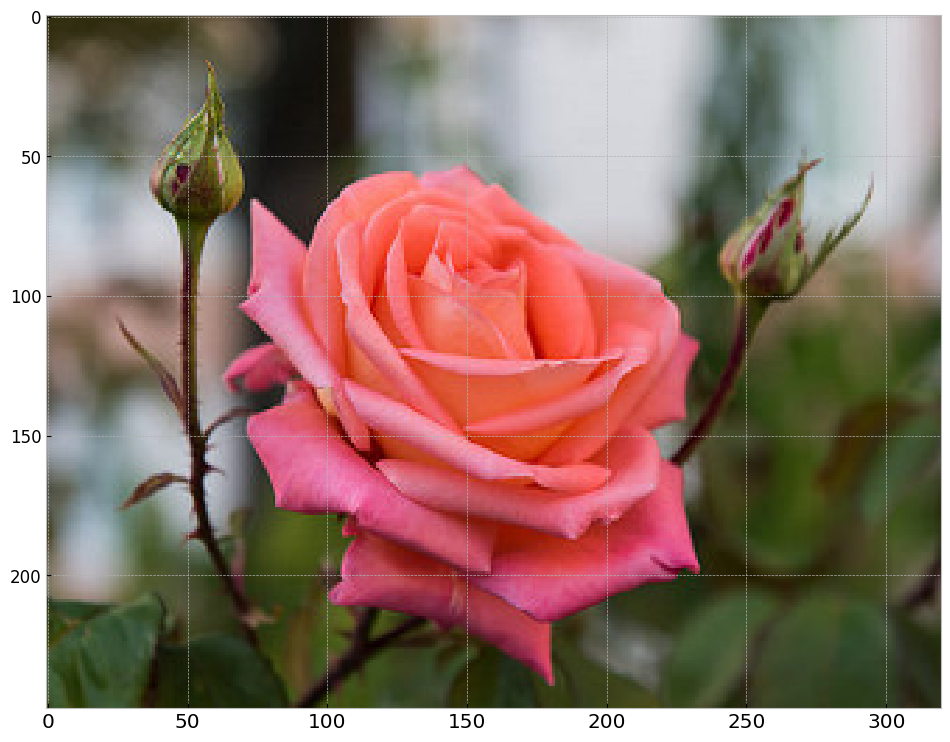

In [13]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB));

In [14]:
input_layer_ir.shape

<Shape: [1,188,188,3]>

In [15]:
# N,C,H,W = batch size, number of channels, height, width.
N, H, W, C  = input_layer_ir.shape
N, H, W, C

(1, 188, 188, 3)

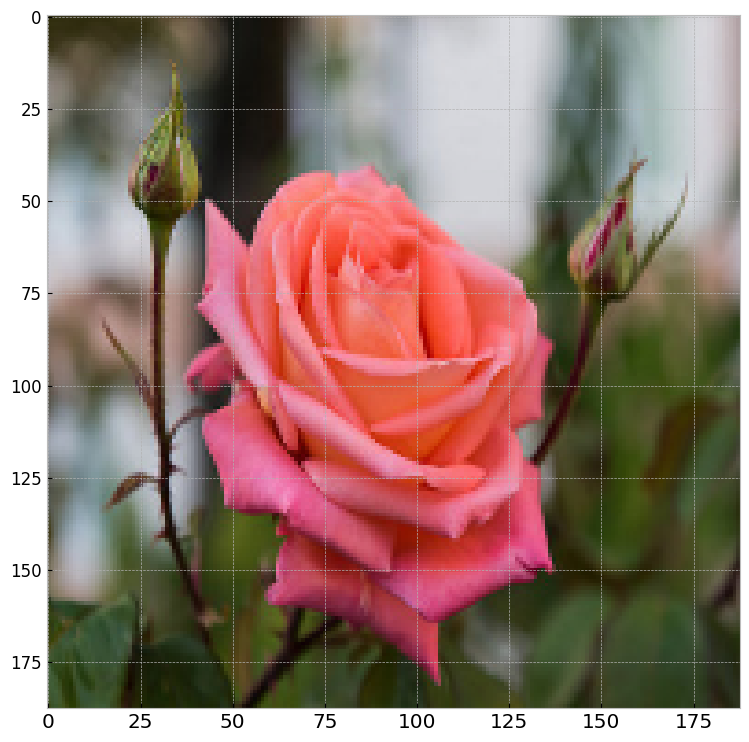

In [16]:
# Resize the image to meet network expected input sizes.
resized_image = cv2.resize(image, (W, H))
plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB));

In [17]:
input_image = np.expand_dims(resized_image, 0)
input_image.shape

(1, 188, 188, 3)

## Inference

In [18]:
# Create an inference request.
y_pred = compiled_model([input_image])[output_layer_ir]
y_pred

array([[-0.35746512,  0.03822001,  0.6477522 , -1.3774176 ,  0.538581  ]],
      dtype=float32)

In [19]:
y_pred.argmax()

2

In [20]:
flower_names = ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']
res = flower_names[y_pred.argmax()]
res

'roses'